In [1]:
import pandas as pd
data = pd.DataFrame({'a': list('CCCDDDEEE'),
                     'b': [2, 7, 4, 1, 2, 6, 8, 4, 7]})

In [2]:
from altair import Chart
chart = Chart(data)

In [3]:
Chart(data).mark_point()

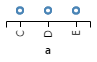

In [4]:
Chart(data).mark_point().encode(
    x='a',
)

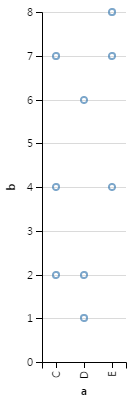

In [5]:
Chart(data).mark_point().encode(
    x='a',
    y='b'
)

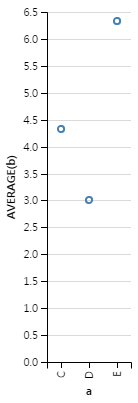

In [6]:
Chart(data).mark_point().encode(
    x='a',
    y='average(b)'
)

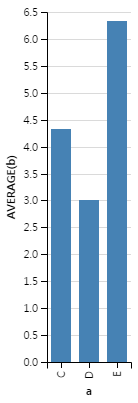

In [7]:
Chart(data).mark_bar().encode(
    x='a',
    y='average(b)'
)

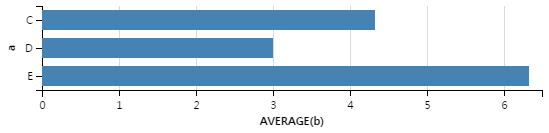

In [8]:
Chart(data).mark_bar().encode(
    y='a',
    x='average(b)'
)

In [9]:
chart = Chart(data).mark_bar().encode(
    x='a',
    y='average(b)',
)
print(chart.to_json(data=False, indent=2))

{
  "encoding": {
    "x": {
      "field": "a",
      "type": "nominal"
    },
    "y": {
      "aggregate": "average",
      "field": "b",
      "type": "quantitative"
    }
  },
  "mark": "bar"
}


In [10]:
from altair import Y
y = Y('average(b):Q')
print(y.to_json())

{"aggregate": "average", "field": "b", "type": "quantitative"}


In [11]:
y = Y(field='b', type='quantitative', aggregate='average')
print(y.to_json())

{"aggregate": "average", "field": "b", "type": "quantitative"}


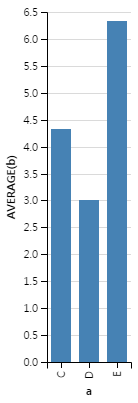

In [12]:
from altair import X, Y

Chart(data).mark_bar().encode(
    X('a', type='nominal'),
    Y('b', type='quantitative', aggregate='average')
)

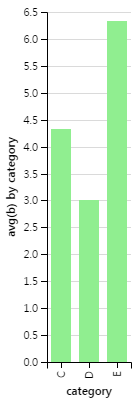

In [13]:
from altair import X, Y, Axis

Chart(data).mark_bar(color='lightgreen').encode(
    X('a', axis=Axis(title='category')),
    Y('average(b)', axis=Axis(title='avg(b) by category'))
)

In [15]:
chart = Chart(data).mark_bar().encode(
    x='a',
    y='average(b)',
)
html = chart.to_html()

# Defining Data

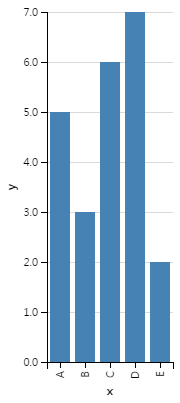

In [16]:
from altair import Chart
import pandas as pd

data = pd.DataFrame({'x': ['A', 'B', 'C', 'D', 'E'],
                     'y': [5, 3, 6, 7, 2]})
Chart(data).mark_bar().encode(
    x='x',
    y='y',
)

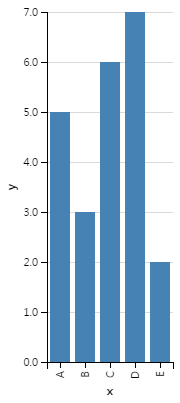

In [17]:
from altair import Chart, Data

data = Data(values=[{'x': 'A', 'y': 5},
                    {'x': 'B', 'y': 3},
                    {'x': 'C', 'y': 6},
                    {'x': 'D', 'y': 7},
                    {'x': 'E', 'y': 2}])
Chart(data).mark_bar().encode(
    x='x:O',  # specify ordinal data
    y='y:Q',  # specify quantitative data
)

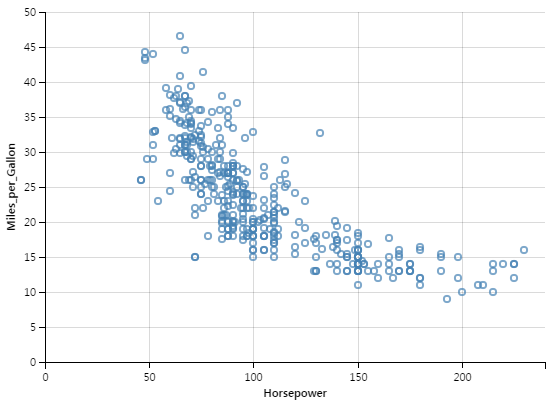

In [18]:
from altair import Chart

url = 'https://vega.github.io/vega-datasets/data/cars.json'

Chart(url).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q'
)

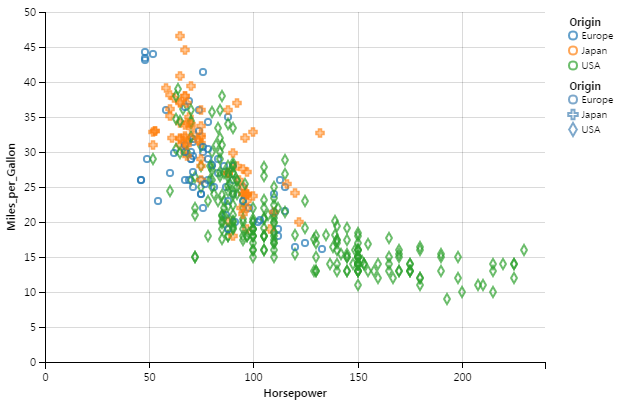

In [19]:
from altair import Chart, load_dataset

cars = load_dataset('cars')

Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    shape='Origin'
)

In [26]:
chart = Chart().encode(x=X('name', type='quantitative'))
print(chart)

In [25]:
print(chart.to_json())

{"encoding": {"x": {"field": "name", "type": "quantitative"}}}


In [28]:
chart = Chart().encode( x='name:Q')
print(chart.to_json())

{"encoding": {"x": {"field": "name", "type": "quantitative"}}}


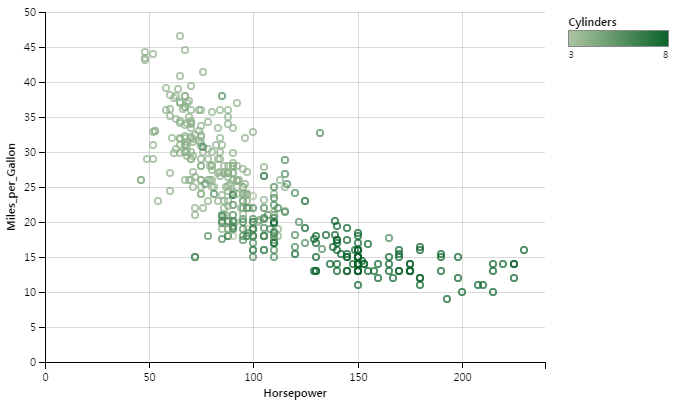

In [29]:
Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color='Cylinders:Q'           # Encode as quantitative (Q)
)

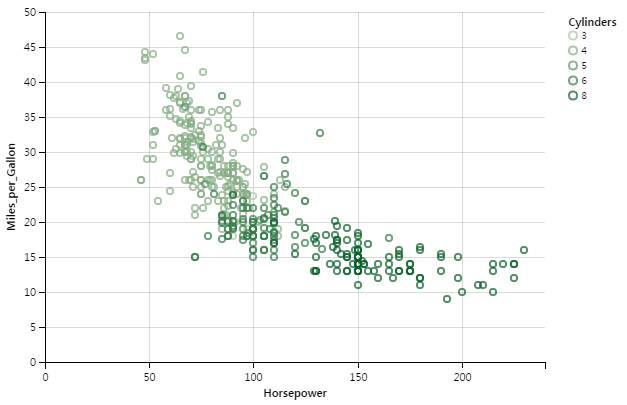

In [30]:
Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color='Cylinders:O'           # Encode as ordinal (O)
)

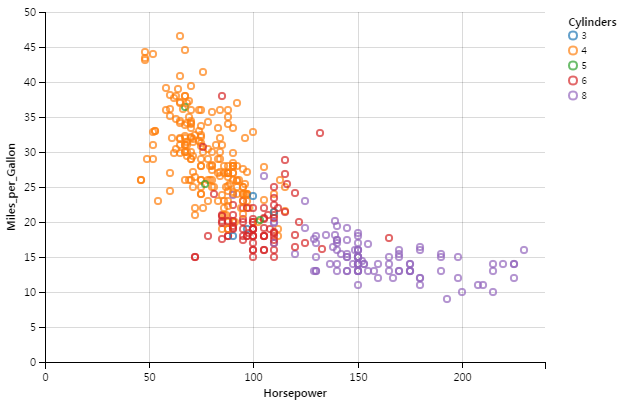

In [31]:
Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color='Cylinders:N'           # Encode as nominal (N)
)

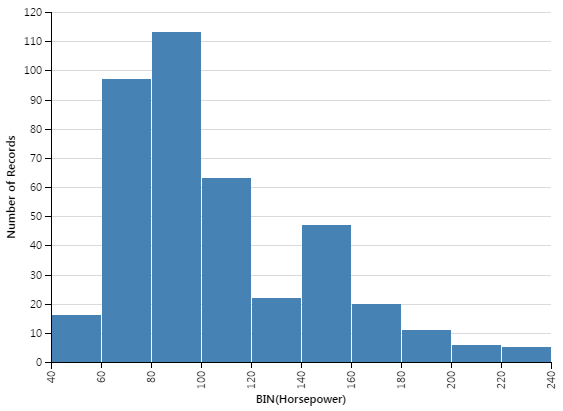

In [32]:
from altair import load_dataset, Chart, X

cars = load_dataset('cars')

Chart(cars).mark_bar().encode(
    X('Horsepower', bin=True),
    y='count(*):Q'
    # could also use Y('*', aggregate='count', type='quantitative')
)

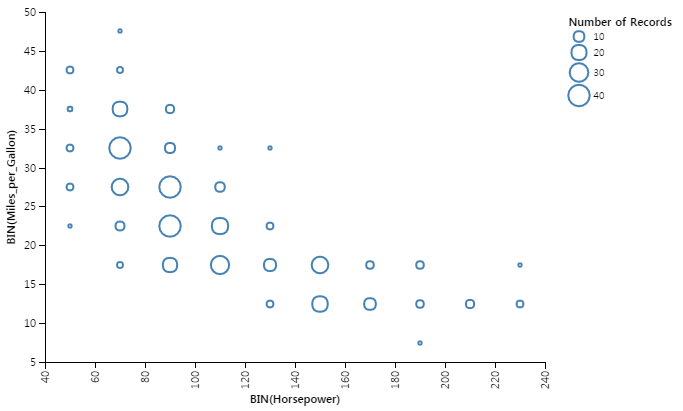

In [33]:
from altair import load_dataset, Chart, X, Y

cars = load_dataset('cars')

Chart(cars).mark_point().encode(
    X('Horsepower', bin=True),
    Y('Miles_per_Gallon', bin=True),
    size='count(*):Q',
)

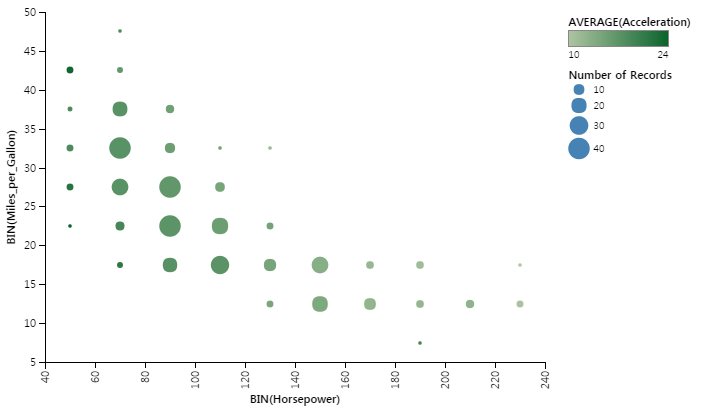

In [34]:
from altair import load_dataset, Chart, X, Y

cars = load_dataset('cars')

Chart(cars).mark_circle().encode(
    X('Horsepower', bin=True),
    Y('Miles_per_Gallon', bin=True),
    size='count(*):Q',
    color='average(Acceleration):Q'
)

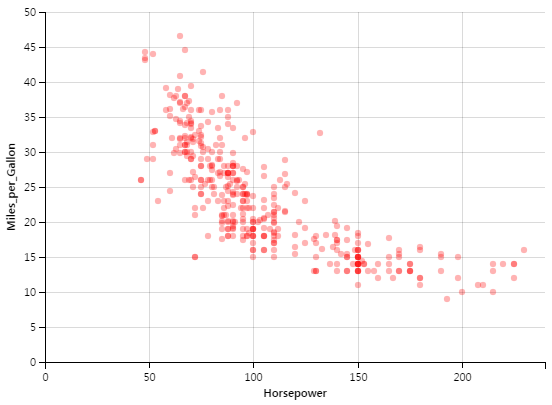

In [35]:
from altair import Chart

url = 'https://vega.github.io/vega-datasets/data/cars.json'

Chart(url).mark_circle(
    color='red',
    opacity=0.3
).encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q'
)

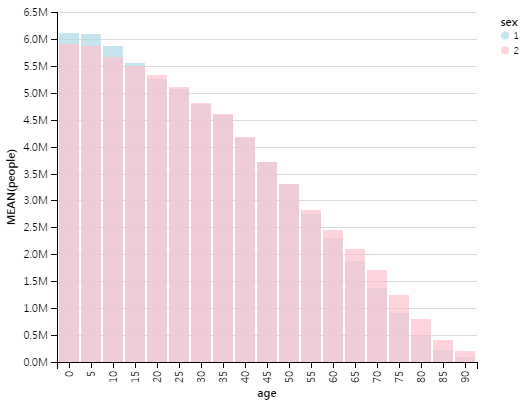

In [36]:
from altair import Chart, Color, Scale

data = 'https://vega.github.io/vega-datasets/data/population.json'
pink_blue = Scale(range=["lightblue", "pink"])

Chart(data).mark_bar().encode(
    x='age:O',
    y='mean(people):Q',
    color=Color('sex:N', scale=pink_blue)
)

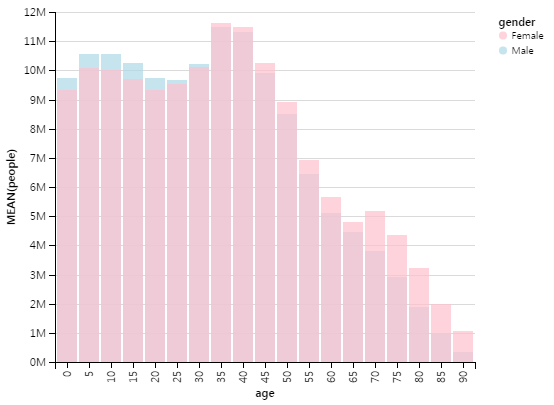

In [37]:
from altair import Chart, Color, Scale, expr

pink_blue = Scale(range=["pink", "lightblue"])

# this does not actually download data;
# just puts a dataframe-like interface around the URL reference
data = expr.DataFrame('https://vega.github.io/vega-datasets/data/population.json')

# Add a new column to the data
data['gender'] = expr.where(data.sex == 1, "Male", "Female")

# Create a filtered version of the data
data2000 = data[data.year == 2000]

Chart(data2000).mark_bar().encode(
    x='age:O',
    y='mean(people):Q',
    color=Color('gender:N', scale=pink_blue)
)

In [38]:
from altair import Chart, expr
data = expr.DataFrame('data.json')
data['gender'] = expr.where(data.sex == 1, "Male", "Female")
data2000 = data[data.year == 2000]
print(Chart(data2000).to_json(indent=2))

{
  "data": {
    "url": "data.json"
  },
  "transform": {
    "calculate": [
      {
        "expr": "if((datum.sex==1),'Male','Female')",
        "field": "gender"
      }
    ],
    "filter": "(datum.year==2000)"
  }
}


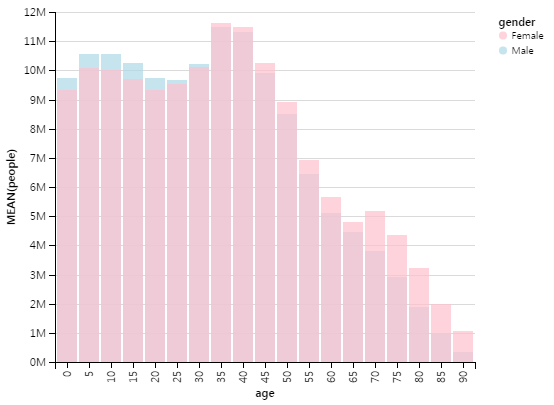

In [39]:
data = 'https://vega.github.io/vega-datasets/data/population.json'

Chart(data).mark_bar().encode(
    x='age:O',
    y='mean(people):Q',
    color=Color('gender:N', scale=pink_blue)
).transform_data(
    calculate=[Formula('gender', expr.where(expr.df.sex==1,'Male','Female'))],
    filter=(expr.df.year == 2000)
)

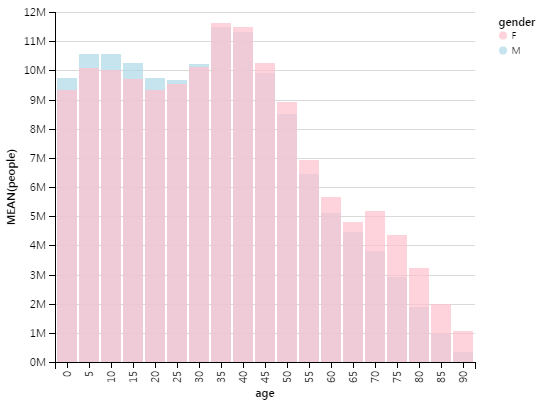

In [40]:
Chart(data).mark_bar().encode(
    x='age:O',
    y='mean(people):Q',
    color=Color('gender:N', scale=pink_blue)
).transform_data(
    calculate=[Formula('gender', 'if(datum.sex == 1, "M", "F")')],
    filter=('datum.year == 2000')
)

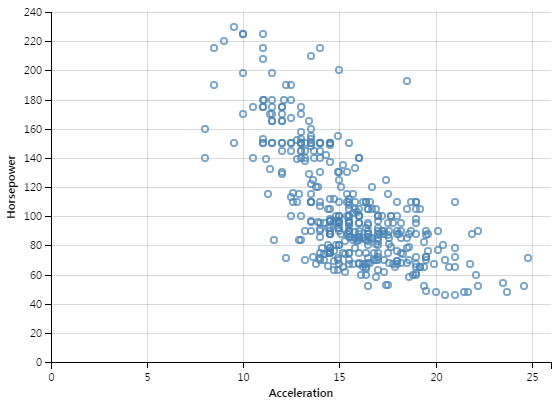

In [41]:
from altair import Chart, load_dataset, X, Y, Scale
data = load_dataset('cars', url_only=True)
Chart(data).mark_point().encode(
    x='Acceleration:Q',
    y='Horsepower:Q'
)

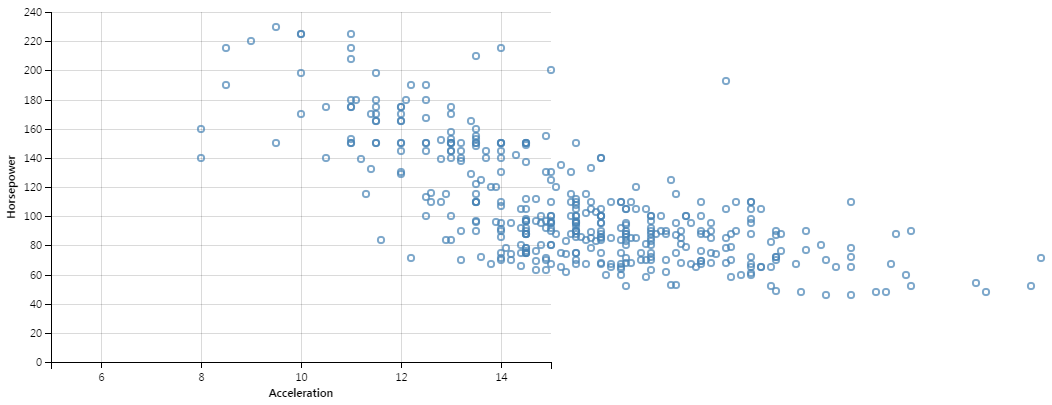

In [42]:
Chart(data).mark_point().encode(
    X('Acceleration:Q', scale=Scale(domain=(5, 15))),
    y='Horsepower:Q'
)

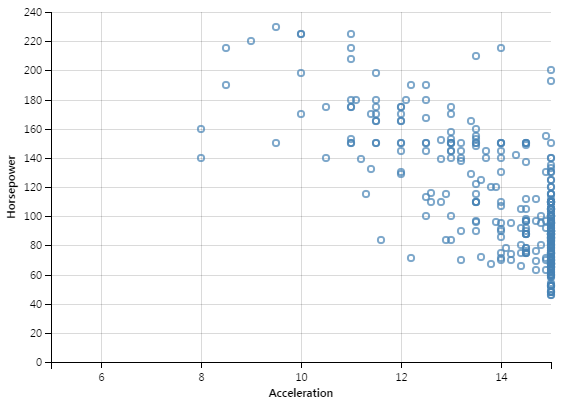

In [43]:
Chart(data).mark_point().encode(
    X('Acceleration:Q', scale=Scale(domain=(5, 15), clamp=True)),
    y='Horsepower:Q'
)

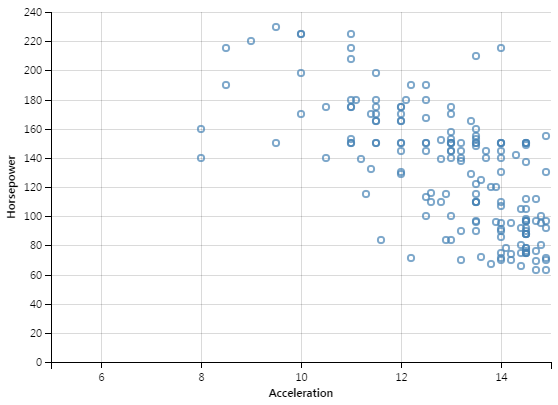

In [44]:
Chart(data).mark_point().encode(
    X('Acceleration:Q', scale=Scale(domain=(5, 15))),
    y='Horsepower:Q'
).transform_data(filter='datum.Acceleration < 15')

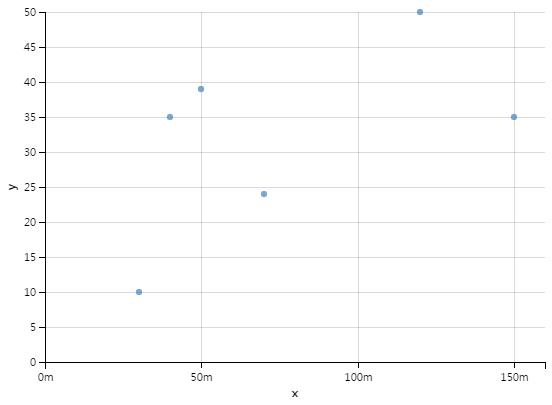

In [45]:
import pandas as pd
from altair import Chart
df = pd.DataFrame({'x': [0.03, 0.04, 0.05, 0.12, 0.07, 0.15],
                   'y': [10, 35, 39, 50, 24, 35]})

Chart(df).mark_circle().encode(
    x='x',
    y='y'
)

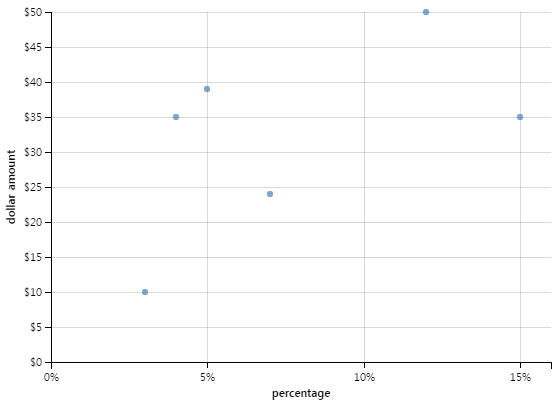

In [46]:
from altair import Chart, X, Y, Axis

Chart(df).mark_circle().encode(
    x=X('x', axis=Axis(format='%', title='percentage')),
    y=Y('y', axis=Axis(format='$', title='dollar amount'))
)

In [47]:
from altair import Chart, load_dataset
data = load_dataset('cars', url_only=True)
chart = Chart(data).mark_point().encode(x='Horsepower:Q',y='Miles_per_Gallon:Q',color='Origin:N',)

In [48]:
print(chart.to_json(indent=2))

{
  "data": {
    "url": "https://vega.github.io/vega-datasets/data/cars.json"
  },
  "encoding": {
    "color": {
      "field": "Origin",
      "type": "nominal"
    },
    "x": {
      "field": "Horsepower",
      "type": "quantitative"
    },
    "y": {
      "field": "Miles_per_Gallon",
      "type": "quantitative"
    }
  },
  "mark": "point"
}


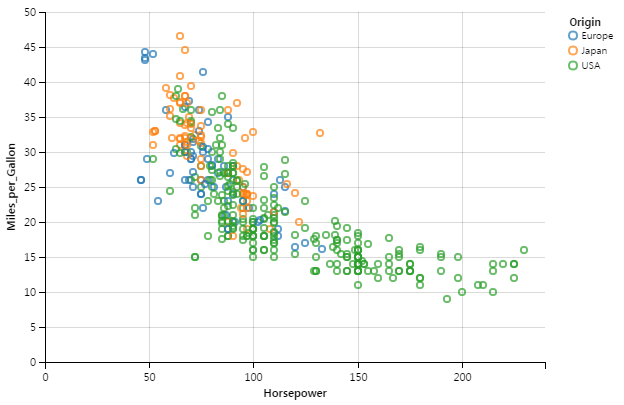

In [49]:
# Within Jupyter Notebook
from altair import Chart, load_dataset
data = load_dataset('cars', url_only=True)
Chart(data).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color='Origin:N',
)